## These are examples of how to use pobability distributions for quantitative continuous data, including normal, standard normal, chi-square, Student's t and Fisher–Snedecor distributions, with Python, Pandas, NumPy and Matplotlib

* the formulas shown at this notebook have been taken from the following reference (and from Wikipedia):<br>
FÁVERO, L. P.; BELFIORE, P. **Manual de Análise de Dados: Estatística e Machine Learning com Excel®, SPSS®, Stata®, R® e Python®**. 2ª edição, 1288 p. Brasil: ccGEN LTC, 2024.<br>
Available in Brazil at:<br>
https://www.amazon.com.br/Manual-An-C3-A1lise-Dados-Estat-C3-ADstica-Learning-dp-8595159920/dp/8595159920

In [1]:
# importing libs and setting default plot style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import pandas as pd
import numpy as np
from statistics import NormalDist
from scipy import stats
from functools import reduce
import math

### Normal (x) and Standard Normal (z-score) Distribution

In [2]:
# we have a normal distribution when the density curve of our distribution is symetric, that is, when all mean, median
# and mode are centered (skewness is always 0), and half of the distribution goes on the left and the other half goes on 
# the right. No only that, we can quantify the distance to the mean by the variance or standard deviation. Empirical rule: 
# for +- 1 standard deviantion around the mean, we have 68.26% of values; for +- 2 standard deviations around the mean we 
# have 95.44% of values; and for +- 3 standard deviations around the mean, we have 99.74% of values. This curve/distribution 
# is called Gaussian curve/distribution or Bell curve. Most natural occuring distributions, which depend on a great number of 
# samples, get close to a Gauss Distribution, and regression and predictive methods can be applied through them. For a better 
# visualization, normal distributions can be adapted to standard normal distributions, with a center mean z = 0 and 
# standard deviations of exactly 1 - differently from the normal distribution, in which the mean and standard deviation 
# can be any real-number value. The transformation is done by transforming individual x values into z-score values, by
# the formula z-score = (x(i) - mean)/sd, so that, then, the x-axis is constituted by each z-score - instead of x(i) - and
# the y-axis keeps being the probability for that z-score point (and respective original x(i) point). Normal distributions are 
# important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose 
# distributions are not known.Their importance is partly due to the central limit theorem. It states that, under some conditions, 
# the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable — 
# whose distribution converges to a normal distribution as the number of samples increases. Therefore, physical quantities that 
# are expected to be the sum of many independent processes, such as measurement errors, often have distributions that are nearly 
# normal. Moreover, Gaussian distributions have some unique properties that are valuable in analytic studies. For instance, any 
# linear combination of a fixed collection of independent normal deviates is a normal deviate. Many results and methods, such as 
# propagation of uncertainty and least squares parameter fitting, can be derived analytically in explicit form when the relevant 
# variables are normally distributed.

![normal](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/normal.png) ![z-score](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/z-score.png) ![std-normal](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/std-normal.png) ![std_normal_cumulative](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/std_normal_cumulative.png)

In [3]:
# Case: the monthly average stock market return for a publicly listed company in Nasdaq has been, in average, 2.8%, with 
# a standard deviation of 1.2%. Based on that, it is asked, about the same stock:

# A - the probability that the return is greater than 4% in a month;
# B - the probability that the return is lower than 3% in a month;
# C - the probability that the return is negative in a month;
# D - the probability that the return is greater than 1% and less than 5% in a month;

my_normal_mean = 0.028
my_normal_sd = 0.012

# defining a function to calculate z-scores from x(i) values, means and standard deviations of normal distributions
def calculate_z_from_x_normal(normal_x,normal_mean, normal_sd):
    return (normal_x-normal_mean)/normal_sd

# defining a function to calculate the probability density function value for a given z, cumulative to that point ]-infinite, z]
# this gives the cumulated probability for values equal or less than z. For values more than z, use the complement 
# "1-the_function_below"
def calculate_prob_from_z_cumulative(std_normal_z):
    return stats.norm.cdf(std_normal_z)

# defining a function to calculate the probability density function value for a given z, not cummulative (for z, individually)
def calculate_prob_from_z_not_cumulative(std_normal_z):
    return stats.norm.pdf(std_normal_z)

# defining a function to calculate the probability density function value for a given x, mean and sd, not cummulative (for x, 
# individually) this function below would be useful to calculate the pdf for a specific point x(i), which is not requested here, 
# as here what is asked is the cumulative probability until point x(i) or above point x(i), that is, the integration of 
# probabilities until or above that x(i) point. Instead of manually calculating the integral, we preferred transforming x(i), 
# mean and sd into z-scores and then using the stats.norm.pdf() already available function.
def calculate_prob_from_x_not_cumulative(normal_x, normal_mean, normal_sd):
    return 1/(normal_sd*math.sqrt(2*math.pi))*math.exp(-1/2*math.pow((normal_x-normal_mean),2)/normal_sd**2)

# A:
my_normal_z_a = calculate_z_from_x_normal(0.04, my_normal_mean, my_normal_sd)
print(f"A - the corresponding z-score for x=0.04 is: z={my_normal_z_a}. Its corresponding cumulated probability is: {calculate_prob_from_z_cumulative(my_normal_z_a)}, for percents equal or lower than that z-score or respective x(i). Its corresponding probability complement is: {1-calculate_prob_from_z_cumulative(my_normal_z_a)}, for percents higher than that z-score or respective x(i). Response: {round((1-calculate_prob_from_z_cumulative(my_normal_z_a))*100,2)}%.")

# B:
my_normal_z_b = calculate_z_from_x_normal(0.03, my_normal_mean, my_normal_sd)
print(f"B - the corresponding z-score for x=0.03 is: z={my_normal_z_b}. Its corresponding cumulated probability is: {calculate_prob_from_z_cumulative(my_normal_z_b)}, for percents equal or lower than that z-score or respective x(i). Response: {round((calculate_prob_from_z_cumulative(my_normal_z_b))*100,2)}%.")

# C:
my_normal_z_c = calculate_z_from_x_normal(0, my_normal_mean, my_normal_sd)
print(f"C - the corresponding z-score for x=0 is: z={my_normal_z_c}. Its corresponding cumulated probability is: {calculate_prob_from_z_cumulative(my_normal_z_c)}, for percents equal or lower than that z-score or respective x(i). Response: {round((calculate_prob_from_z_cumulative(my_normal_z_c))*100,2)}%.")

# D:
my_normal_z_d_1 = calculate_z_from_x_normal(0.01, my_normal_mean, my_normal_sd)
my_normal_z_d_2 = calculate_z_from_x_normal(0.05, my_normal_mean, my_normal_sd)
print(f"D - the corresponding limit z-scores for the interval between x=0.01 and x=0.05 are: z={my_normal_z_d_1} and x={my_normal_z_d_2}. The cumulated probability for percents between that interval is: {calculate_prob_from_z_cumulative(my_normal_z_d_2)-calculate_prob_from_z_cumulative(my_normal_z_d_1)}. Response: {round((calculate_prob_from_z_cumulative(my_normal_z_d_2)-calculate_prob_from_z_cumulative(my_normal_z_d_1))*100,2)}%.")


A - the corresponding z-score for x=0.04 is: z=1.0. Its corresponding cumulated probability is: 0.8413447460685429, for percents equal or lower than that z-score or respective x(i). Its corresponding probability complement is: 0.15865525393145707, for percents higher than that z-score or respective x(i). Response: 15.87%.
B - the corresponding z-score for x=0.03 is: z=0.16666666666666652. Its corresponding cumulated probability is: 0.5661838326109035, for percents equal or lower than that z-score or respective x(i). Response: 56.62%.
C - the corresponding z-score for x=0 is: z=-2.3333333333333335. Its corresponding cumulated probability is: 0.009815328628645334, for percents equal or lower than that z-score or respective x(i). Response: 0.98%.
D - the corresponding limit z-scores for the interval between x=0.01 and x=0.05 are: z=-1.5000000000000002 and x=1.8333333333333335. The cumulated probability for percents between that interval is: 0.8998162911463247. Response: 89.98%.


     Z_SCORE  PROBABILITY
0       -5.0     0.000001
1       -4.9     0.000002
2       -4.8     0.000004
3       -4.7     0.000006
4       -4.6     0.000010
..       ...          ...
96       4.6     0.000010
97       4.7     0.000006
98       4.8     0.000004
99       4.9     0.000002
100      5.0     0.000001

[101 rows x 2 columns]




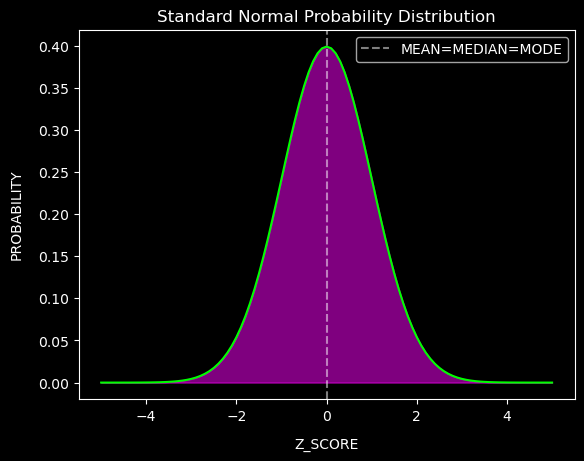

In [4]:
# calculating and plotting some sample z and prob(z) data in order to plot a standard normal distribution graph example (not 
# related to the data above)

# creating x_axis and y_axis values lists
z_score_x_axis_list = [-5.00,-4.90,-4.80,-4.70,-4.60,-4.50,-4.40,-4.30,-4.20,-4.10,-4.00,-3.90,-3.80,-3.70,-3.60,-3.50,-3.40,
                       -3.30,-3.20,-3.10,-3.00,-2.90,-2.80,-2.70,-2.60,-2.50,-2.40,-2.30,-2.20,-2.10,-2.00,-1.90,-1.80,-1.70,
                       -1.60,-1.50,-1.40,-1.30,-1.20,-1.10,-1.00,-0.90,-0.80,-0.70,-0.60,-0.50,-0.40,-0.30,-0.20,-0.10,0.00,
                       0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00,1.10,1.20,1.30,1.40,1.50,1.60,1.70,1.80,1.90,2.00,
                       2.10,2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00,3.10,3.20,3.30,3.40,3.50,3.60,3.70,3.80,3.90,4.00,
                       4.10,4.20,4.30,4.40,4.50,4.60,4.70,4.80,4.90,5.00]
z_score_y_axis_list = list(map(calculate_prob_from_z_not_cumulative, z_score_x_axis_list))

# tabulating data into a pandas dataframe
z_score_dataframe = pd.DataFrame(columns=["Z_SCORE", "PROBABILITY"])
z_score_dataframe["Z_SCORE"] = z_score_x_axis_list
z_score_dataframe["PROBABILITY"] = z_score_y_axis_list
print(f"{z_score_dataframe.loc[0:z_score_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph
fig, ax = plt.subplots()
ax.plot(z_score_x_axis_list, z_score_y_axis_list, color="lime")
ax.set_xlabel("Z_SCORE", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=z_score_dataframe.Z_SCORE, y1=z_score_dataframe.PROBABILITY, y2=0, color="fuchsia", alpha=0.5)
ax.axvline(0, alpha=0.5, linestyle=('--'), label="MEAN=MEDIAN=MODE")
ax.set_title("Standard Normal Probability Distribution")
plt.legend(loc="upper right")
plt.show()

### Chi-square Distribution

In [14]:
# The chi-squared distribution is a positive asymmetric (skewness > 0) distribution, with k degrees of freedom, which is the 
# result of the sum of the squares of k independent standard normal random variables. The chi-squared distribution is a special 
# case of the gamma distribution and is one of the most widely used probability distributions in inferential statistics, notably 
# in hypothesis testing and in construction of confidence intervals. The chi-squared distribution is used in the common 
# chi-squared tests for goodness of fit of an observed distribution to a theoretical one, the independence of two criteria of 
# classification of qualitative data (https://github.com/danielpm1982/sample-jupyter-notebook-statistics/blob/master/chi-square.ipynb), 
# and in finding the confidence interval for estimating the population standard deviation of a normal distribution from a sample 
# standard deviation. Many other statistical tests also use this distribution, such as Friedman's analysis of variance by ranks.

![chi-square-pdf](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/chi-square-pdf.png) ![https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/chi-square-cdf](chi-square-cdf.png)

In [16]:
# Case: a scholar has concluded that one of his research tests must be evaluated according to a chi-square distribution, with 7 
# degrees of freedom. In such a context, calculate:
# A - the probability that, at that test, he finds an X>6
# B - the probability that, at that test, he finds an X<8
# C - the x value that makes the probability P(X>x) be 5%, that is, for what x value he would have 5% of getting values above 
# that x
# D - the x value that makes the probability P(X<x) be 90%, that is, for what x value he would have 90% of getting values below 
# that x

DEGREES_OF_FREEDOM = 7

# defining a function to calculate the cumulative probability at a certain chi-square x value (left tail)
def calculate_prob_from_chi_square_x_cumulative(chi_square_x, degrees_of_freedom):
    return stats.chi2.cdf(chi_square_x, degrees_of_freedom)

# defining a function to calculate the inverse of cdf(), that is, the critical chi-square value for the complement of the 
# confidence level desired (1-right_tail prob = left_tail prob)
def calculate_x_chi_square_value_for_prob_cumulative(left_tail_prob, degrees_of_freedom):
    return stats.chi2.ppf(left_tail_prob, degrees_of_freedom)
    
# defining a function to calculate the not cumulative probability at a certain chi-square x value (for x individually)
def calculate_prob_from_chi_square_x_not_cumulative(chi_square_x, degrees_of_freedom):
    return stats.chi2.pdf(chi_square_x, degrees_of_freedom)

# A:
print(f"A - the cumulated probability for x>6 (right tail) is: {1-calculate_prob_from_chi_square_x_cumulative(6,7)}. Response: {round((1-calculate_prob_from_chi_square_x_cumulative(6,7))*100,2)}%.")

# B:
print(f"B - the cumulated probability for x<8 (left tail) is: {calculate_prob_from_chi_square_x_cumulative(8,7)}. Response: {round((calculate_prob_from_chi_square_x_cumulative(8,7))*100,2)}%.")

# C:
print(f"C - the x value so that the cumulated probability above it is 5% (right tail prob) is: {calculate_x_chi_square_value_for_prob_cumulative(1-0.05,7)}. Response: X = {round(calculate_x_chi_square_value_for_prob_cumulative(1-0.05,7),2)}.")

# D:
print(f"D - the x value so that the cumulated probability below it is 90% (left tail prob) is: {calculate_x_chi_square_value_for_prob_cumulative(0.90,7)}. Response: X = {round(calculate_x_chi_square_value_for_prob_cumulative(0.90,7),2)}.")


A - the cumulated probability for x>6 (right tail) is: 0.539749350395557. Response: 53.97%.
B - the cumulated probability for x<8 (left tail) is: 0.6674060974006919. Response: 66.74%.
C - the x value so that the cumulated probability above it is 5% (right tail prob) is: 14.067140449340169. Response: X = 14.07.
D - the x value so that the cumulated probability below it is 90% (left tail prob) is: 12.017036623780532. Response: X = 12.02.


    CHI_SQUARE_X  PROBABILITY
0            0.0     0.000000
1            0.5     0.003662
2            1.0     0.016131
3            1.5     0.034620
4            2.0     0.055348
..           ...          ...
36          18.0     0.004512
37          18.5     0.003763
38          19.0     0.003133
39          19.5     0.002603
40          20.0     0.002160

[41 rows x 2 columns]




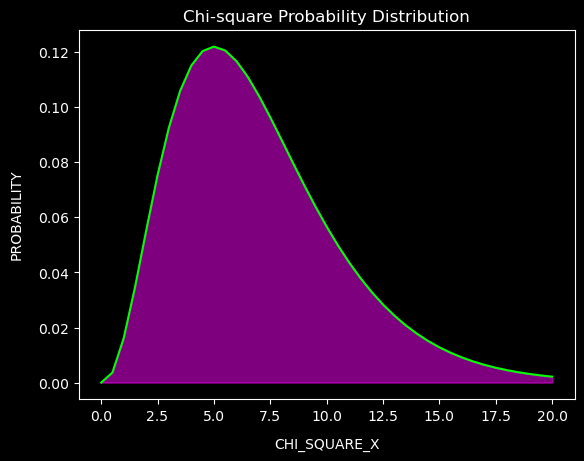

In [17]:
# calculating and plotting some sample chi_square x and prob(x) data in order to plot a chi-square distribution graph example 
# (not related to the data above)

DEGREES_OF_FREEDOM = 7

# creating and calculating x_axis and y_axis values lists
chi_square_x_axis_list = np.arange(0,20.5,0.5)
chi_square_y_axis_list=[]
for chi_square_x_temp in chi_square_x_axis_list:
    chi_square_y_axis_list.append(calculate_prob_from_chi_square_x_not_cumulative(chi_square_x_temp, DEGREES_OF_FREEDOM))

# tabulating data into a pandas dataframe
chi_square_dataframe = pd.DataFrame(columns=["CHI_SQUARE_X", "PROBABILITY"])
chi_square_dataframe["CHI_SQUARE_X"] = chi_square_x_axis_list
chi_square_dataframe["PROBABILITY"] = chi_square_y_axis_list
with pd.option_context('display.max_rows', 10):
    print(f"{chi_square_dataframe.loc[0:chi_square_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph
fig, ax = plt.subplots()
ax.plot(chi_square_x_axis_list, chi_square_y_axis_list, color="lime")
ax.set_xlabel("CHI_SQUARE_X", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=chi_square_dataframe.CHI_SQUARE_X, y1=chi_square_dataframe.PROBABILITY, y2=0, color="fuchsia", alpha=0.5)
ax.set_title("Chi-square Probability Distribution")
plt.show()

### Student's t Distribution

In [19]:
# Student's t distribution (or simply the t distribution) is a continuous probability distribution that generalizes the standard 
# normal distribution. Like the latter, it is symmetric around zero and bell-shaped. However, it has heavier tails and the amount 
# of probability mass in the tails is controlled by the parameter ν (degrees of freedom). For ν = 1 the Student's t distribution 
# becomes the standard Cauchy distribution, which has very "fat" tails; whereas for ν → ∞ it becomes the standard normal 
# distribution N(0,1), which has very "thin" tails. The Student's t distribution plays a role in a number of widely used 
# statistical analyses, including Student's t test for assessing the statistical significance of the difference between two sample 
# means, the construction of confidence intervals for the difference between two population means, and in linear regression 
# analysis.

![student-pdf](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/student-pdf.png) ![student-cdf](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/student-cdf.png)

In [22]:
# Case: in a quality control context, a manager at a company is performing some analysis based on Student's t distribution, with 
# 7 degrees of freedom. Considering that, calculate:

# A - the probability that he finds t>2.5
# B - the probability that he finds t<-2.5
# C - the probability that he finds t>-1 and t<2
# D - the t value that makes the probability P(T>t) be 5%, that is, for what t value he would have 5% of getting values above 
# that t

DEGREES_OF_FREEDOM = 7

# defining a function to calculate the cumulative probability at a certain t value (left tail)
def calculate_prob_from_t_cumulative(t_value, degrees_of_freedom):
    return stats.t.cdf(t_value, degrees_of_freedom)

# defining a function to calculate the inverse of cdf(), that is, the critical t value for the complement of the confidence level
# desired (1-right_tail prob = left_tail prob)
def calculate_t_value_for_prob_cumulative(left_tail_prob, degrees_of_freedom):
    return stats.t.ppf(left_tail_prob, degrees_of_freedom)
    
# defining a function to calculate the not cumulative probability at a certain t value (for t individually)
def calculate_prob_from_t_not_cumulative(t_value, degrees_of_freedom):
    return stats.t.pdf(t_value, degrees_of_freedom)

# A:
print(f"A - the cumulated probability for t>2.5 (right tail) is: {1-calculate_prob_from_t_cumulative(2.5,7)}. Response: {round((1-calculate_prob_from_t_cumulative(2.5,7))*100,2)}%.")
print(f"B - the cumulated probability for t<-2.5 (left tail) is: {calculate_prob_from_t_cumulative(-2.5,7)}. Response: {round((calculate_prob_from_t_cumulative(-2.5,7))*100,2)}%.")
print(f"C - the cumulated probability for percents for interval between t=-1 and t=2 is: {calculate_prob_from_t_cumulative(2,7)-calculate_prob_from_t_cumulative(-1,7)}. Response: {round((calculate_prob_from_t_cumulative(2,7)-calculate_prob_from_t_cumulative(-1,7))*100,2)}%.")
print(f"D - the t value so that the cumulated probability above it is 5% (right tail prob) is: {calculate_t_value_for_prob_cumulative(1-0.05,7)}. Response: t = {round(calculate_t_value_for_prob_cumulative(1-0.05,7),2)}.")

A - the cumulated probability for t>2.5 (right tail) is: 0.020496109292876374. Response: 2.05%.
B - the cumulated probability for t<-2.5 (left tail) is: 0.020496109292876437. Response: 2.05%.
C - the cumulated probability for percents for interval between t=-1 and t=2 is: 0.7818820043084084. Response: 78.19%.
D - the t value so that the cumulated probability above it is 5% (right tail prob) is: 1.894578605061305. Response: t = 1.89.


     STUDENT_t  PROBABILITY
0         -5.0     0.000882
1         -4.9     0.001000
2         -4.8     0.001135
3         -4.7     0.001291
4         -4.6     0.001470
..         ...          ...
96         4.6     0.001470
97         4.7     0.001291
98         4.8     0.001135
99         4.9     0.001000
100        5.0     0.000882

[101 rows x 2 columns]




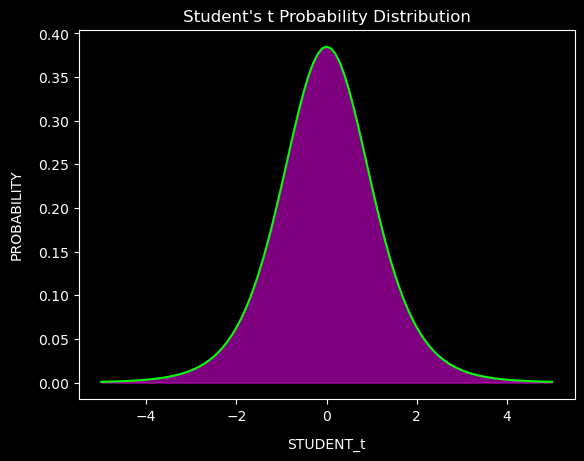

In [26]:
# calculating and plotting some sample t and prob(t) data in order to plot a Student's t distribution graph example (not related 
# to the data above)

DEGREES_OF_FREEDOM = 7

# creating and calculating x_axis and y_axis values lists
students_t_x_axis_list = np.arange(-5,5.1,0.1)
students_t_y_axis_list=[]
for t_temp in students_t_x_axis_list:
    students_t_y_axis_list.append(calculate_prob_from_t_not_cumulative(t_temp, DEGREES_OF_FREEDOM))

# tabulating data into a pandas dataframe
t_dataframe = pd.DataFrame(columns=["STUDENT_t", "PROBABILITY"])
t_dataframe["STUDENT_t"] = students_t_x_axis_list
t_dataframe["PROBABILITY"] = students_t_y_axis_list
print(f"{t_dataframe.loc[0:t_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph
fig, ax = plt.subplots()
ax.plot(students_t_x_axis_list, students_t_y_axis_list, color="lime")
ax.set_xlabel("STUDENT_t", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=t_dataframe.STUDENT_t, y1=t_dataframe.PROBABILITY, y2=0, color="fuchsia", alpha=0.5)
ax.set_title("Student's t Probability Distribution")
plt.show()

### Fisher–Snedecor distribution (or F distribution)

In [30]:
# F-distribution or F-ratio, also known as Snedecor's F distribution or the Fisher–Snedecor distribution (after Ronald Fisher and
# George W. Snedecor), is a continuous probability distribution that arises frequently as the null distribution of a test 
# statistic, most notably in the analysis of variance (ANOVA) and other F-tests. It is asymmetric and with positive skewness 
# when its degrees of freedom at the numerator and denominator - v1 and v2 (or d1 and d2) - are low. Pdf and cdf formulas below.

![Fisher-Snedecor](https://raw.githubusercontent.com/danielpm1982/sample-jupyter-notebook-statistics/master/Fisher-Snedecor.png)

In [31]:
# Case: a scientist is evaluating a statistics analysis test that follows the Fisher-Snedecor distribution. It has 17 degrees of 
# freedom at the numerator and 28 degrees of freedom at the denominator. Calculate:

# A - probability that x > 1.5
# B - probability that x < 1
# C - probability that 2 < x < 3
# D - the F value that makes the probability P(X>x) be 5%, that is, for what F value x he would have 5% of getting values above 
# that x

DEGREES_OF_FREEDOM_NUMERATOR = 17
DEGREES_OF_FREEDOM_DENOMINATOR = 28

# defining a function to calculate the cumulative probability at a certain f value (left tail)
def calculate_prob_from_f_cumulative(f_value, degrees_of_freedom_numerator, degrees_of_freedom_denominator):
    return stats.f.cdf(f_value, degrees_of_freedom_numerator, degrees_of_freedom_denominator)

# defining a function to calculate the inverse of cdf(), that is, the critical f value for the complement of the confidence level
# desired (1-right_tail prob = left_tail prob)
def calculate_f_value_for_prob_cumulative(left_tail_prob, degrees_of_freedom_numerator, degrees_of_freedom_denominator):
    return stats.f.ppf(left_tail_prob, degrees_of_freedom_numerator, degrees_of_freedom_denominator)
    
# defining a function to calculate the not cumulative probability at a certain f value (for f individually)
def calculate_prob_from_f_not_cumulative(f_value, degrees_of_freedom_numerator, degrees_of_freedom_denominator):
    return stats.f.pdf(f_value, degrees_of_freedom_numerator, degrees_of_freedom_denominator)

# A:
print(f"A - the cumulated probability for f>1.5 (right tail) is: {1-calculate_prob_from_f_cumulative(1.5,DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR)}. Response: {round((1-calculate_prob_from_f_cumulative(1.5,DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR))*100,2)}%.")
print(f"B - the cumulated probability for f<1 (left tail) is: {calculate_prob_from_f_cumulative(1,DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR)}. Response: {round((calculate_prob_from_f_cumulative(1,DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR))*100,2)}%.")
print(f"C - the cumulated probability for percents for interval between f=2 and f=3 is: {calculate_prob_from_f_cumulative(3,DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR)-calculate_prob_from_f_cumulative(2,DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR)}. Response: {round((calculate_prob_from_f_cumulative(3,DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR)-calculate_prob_from_f_cumulative(2,DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR))*100,2)}%.")
print(f"D - the f value so that the cumulated probability above it is 5% (right tail prob) is: {calculate_f_value_for_prob_cumulative(1-0.05, DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR)}. Response: t = {round(calculate_f_value_for_prob_cumulative(1-0.05, DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR),2)}.")


A - the cumulated probability for f>1.5 (right tail) is: 0.16605717926271168. Response: 16.61%.
B - the cumulated probability for f<1 (left tail) is: 0.5142237972801845. Response: 51.42%.
C - the cumulated probability for percents for interval between f=2 and f=3 is: 0.04549975118639882. Response: 4.55%.
D - the f value so that the cumulated probability above it is 5% (right tail prob) is: 2.003037329633825. Response: t = 2.0.


        F  PROBABILITY
0    0.00     0.000000
1    0.05     0.000003
2    0.10     0.000329
3    0.15     0.003652
4    0.20     0.017039
..    ...          ...
96   4.80     0.000233
97   4.85     0.000212
98   4.90     0.000193
99   4.95     0.000175
100  5.00     0.000159

[101 rows x 2 columns]




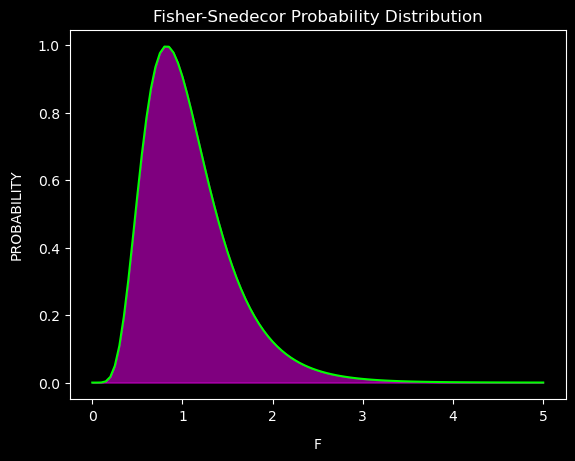

In [33]:
# calculating and plotting some sample f and prob(f) data in order to plot a Fisher-Snedecor distribution graph example (not 
# related to the data above)

DEGREES_OF_FREEDOM_NUMERATOR = 17
DEGREES_OF_FREEDOM_DENOMINATOR = 28

# creating and calculating x_axis and y_axis values lists
f_x_axis_list = np.arange(0,5.05,0.05)
f_y_axis_list=[]
for f_temp in f_x_axis_list:
    f_y_axis_list.append(calculate_prob_from_f_not_cumulative(f_temp, DEGREES_OF_FREEDOM_NUMERATOR, DEGREES_OF_FREEDOM_DENOMINATOR))

# tabulating data into a pandas dataframe
f_dataframe = pd.DataFrame(columns=["F", "PROBABILITY"])
f_dataframe["F"] = f_x_axis_list
f_dataframe["PROBABILITY"] = f_y_axis_list
print(f"{f_dataframe.loc[0:f_dataframe.size:1]}\n\n")

# plotting both axis' data into a matplotlib graph
fig, ax = plt.subplots()
ax.plot(f_x_axis_list, f_y_axis_list, color="lime")
ax.set_xlabel("F", labelpad=10)
ax.set_ylabel("PROBABILITY", labelpad=10)
ax.fill_between(x=f_dataframe.F, y1=f_dataframe.PROBABILITY, y2=0, color="fuchsia", alpha=0.5)
ax.set_title("Fisher-Snedecor Probability Distribution")
plt.show()